In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import seaborn as sns
import warnings
from matplotlib import patches as patches
import math
import copy
warnings.simplefilter("ignore")
%matplotlib inline
import math
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use("bmh")
font = {
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
from mpl_toolkits import mplot3d

# Implementation

In [560]:
class GA(object):
    
    def __init__(self, pop_size, n_dims, fun):
        self.pop_size = pop_size #Population size
        self.n_dims = n_dims #Number of dimensions that is function domain
        self.fun = fun #Function for optimalisation
        
        self.pop_dims = (pop_size, n_dims) #Population dimensions
        self.population = np.random.uniform(-5.12,5.12, size = self.pop_dims) #Random initialisation
        
        self.scores = []
        self.average_scores = []
        self.best_scores = []
        self.when_best = []
        self.best_genotype = []
        self.best_scores.append(np.Inf)
        
        
    def pop_scores(self): #Function that updates scores
        scores = []
        for genotype in self.population:
            scores.append(abs(self.fun(genotype)))
        self.scores.append(scores)
        self.average_scores.append(np.mean(self.scores[-1]))
        
        candidate = np.min(self.scores[-1])
        if(candidate < self.best_scores[-1]):
            self.best_scores.append(candidate)
            self.when_best.append(self.epoch)
            self.best_genotype.append(self.population[np.argmin(self.scores[-1]),:])
        
    def mutation(self):
        for genotype_n in range(self.offspring.shape[0]):
            seed = np.random.uniform(0,1)
            if(seed < self.mut_prob):
                gaussian_value = np.random.normal(size = self.offspring.shape[1]) #Gaussian mutation
                self.offspring[genotype_n] += gaussian_value
                
    def crossover(self):
        self.pop_scores()
        p = (1e-6 +np.max(self.scores[-1])-self.scores[-1])/(1e-6 + np.sum(np.max(self.scores[-1]) - self.scores[-1]))
        p = p/(sum(p)) #Pobabilities of best genotypes
        n = self.population.shape[0]
        k = int(n*self.cross_prob)
        if(k%2 != 0):
            k += 1
        s = self.population.shape[1] - 1
        parents_indx = np.random.choice(n, k, p = p, replace = False)

        self.offspring = np.empty(shape = (int(k/2), self.n_dims))
        i = -1
        while(i+2<len(parents_indx)):
            point = int(np.random.choice(s,1))
            i += 1
            self.offspring[int(i/2), 0:point] = self.population[parents_indx[i], 0:point]
            self.offspring[int(i/2), point:] = self.population[parents_indx[i+1], point:]
            i += 1
            
    def fit(self, n_epochs, mut_prob = 0.2, cross_prob = 0.7):
        self.n_epochs = n_epochs
        self.mut_prob = mut_prob
        self.epoch = 0
        self.cross_prob = cross_prob
        
        self.pop_scores()
        for epoch in range(self.n_epochs):
            self.epoch = epoch*2
            if(self.best_scores == 0):
                break
            self.crossover()
            self.mutation()
            self.population = np.append(self.population,self.offspring, axis = 0)
            self.pop_scores()
            
            p = (1e-6 +np.max(self.scores[-1])-self.scores[-1])/(1e-6 +np.sum(np.max(self.scores[-1]) - self.scores[-1]))
            p = p/(sum(p))
            n = self.population.shape[0]
            k = self.pop_size
            winners_indx = np.random.choice(n, k, p = p, replace = False)
            self.population = self.population[winners_indx,:]
            
            
        
        
        

## First function

In [570]:
fun = lambda a : a[0]**2 + a[1]**2 + 2*a[2]**2

ga = GA(pop_size = 1000,n_dims = 3, fun = fun)

In [571]:
ga.fit(100)

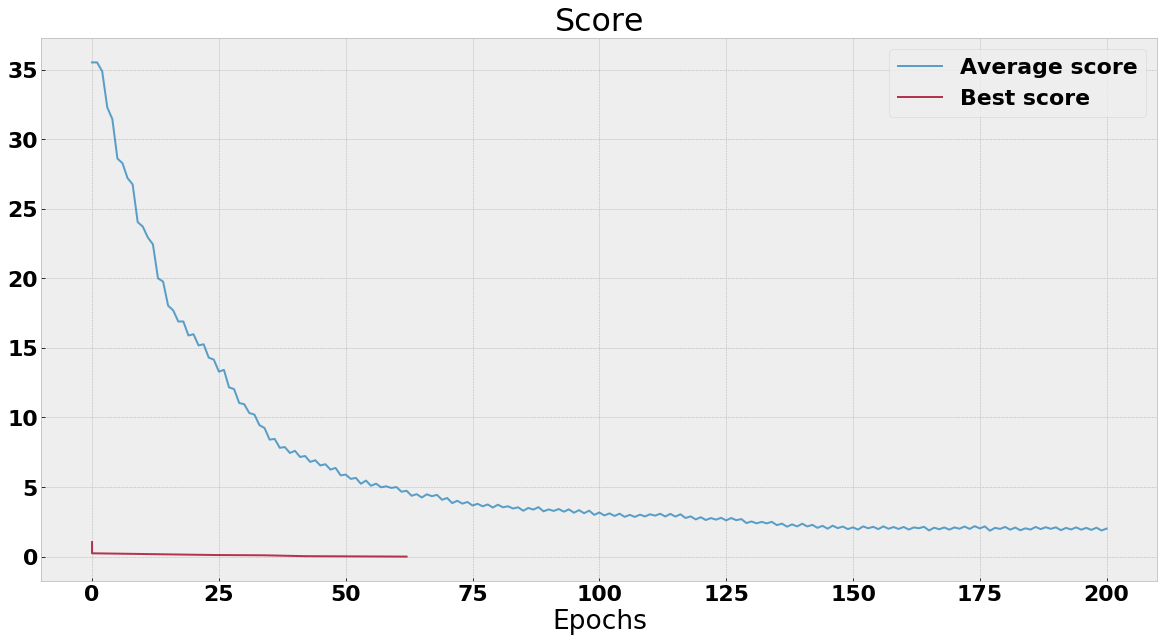

In [572]:
a = len(ga.average_scores)
b = ga.when_best
fig = plt.figure(figsize = [20,10])
ax = plt.subplot(111)
plt.plot(range(a), ga.average_scores, alpha = 0.8, markersize = 4, label = "Average score")
plt.plot(b, ga.best_scores[1:], alpha = 0.8, markersize = 4, label = "Best score")
plt.title('Score')
plt.xlabel("Epochs")
ax.legend()
plt.show()

Where score is value of function in points given by genotype in specific epoch. In case of average score it is avarega score fromm all population, best score is score from best individual.

In [522]:
print(ga.best_scores[-1])
print(ga.best_genotype[-1])

0.00044730281470892284
[-0.00671949  0.00129492 -0.01415052]


### Different population sizes

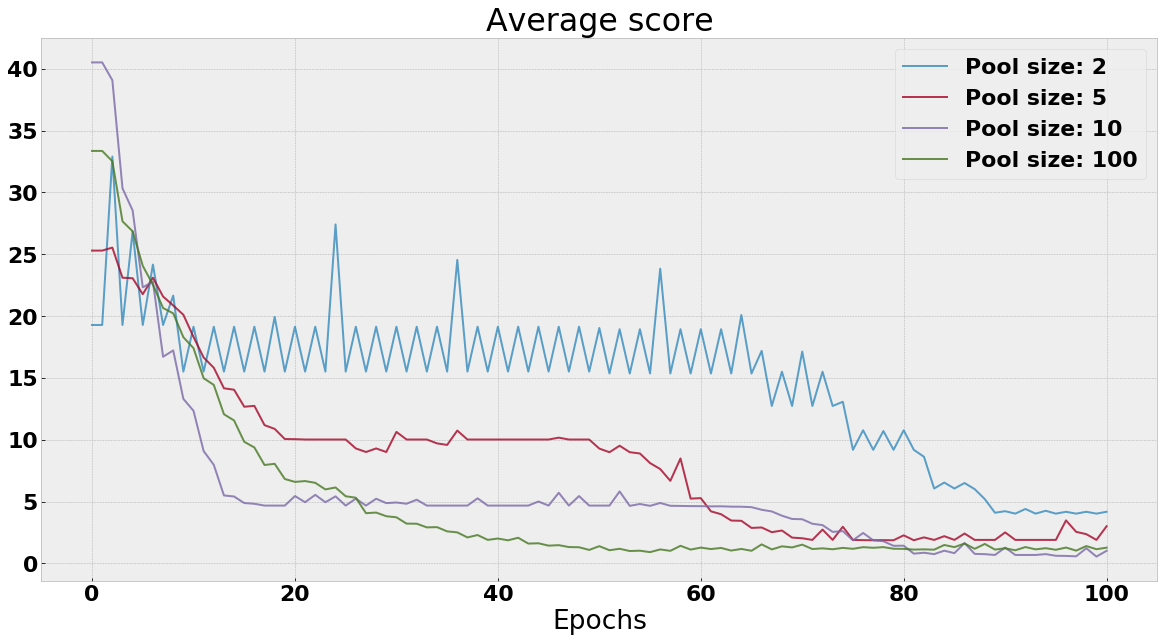

In [526]:

ga1 = GA(pop_size = 2,n_dims = 3, fun = fun)
ga2 = GA(pop_size = 5,n_dims = 3, fun = fun)
ga3 = GA(pop_size = 10,n_dims = 3, fun = fun)
ga4 = GA(pop_size = 100,n_dims = 3, fun = fun)

ga1.fit(50)
ga2.fit(50)
ga3.fit(50)
ga4.fit(50)

a = len(ga1.average_scores)

fig = plt.figure(figsize = [20,10])
ax = plt.subplot(111)
plt.plot(range(a), ga1.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 2")
plt.plot(range(a), ga2.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 5")
plt.plot(range(a), ga3.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 10")
plt.plot(range(a), ga4.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 100")
plt.title('Average score')
plt.xlabel("Epochs")
ax.legend()
plt.show()

### Different mutation probabilities

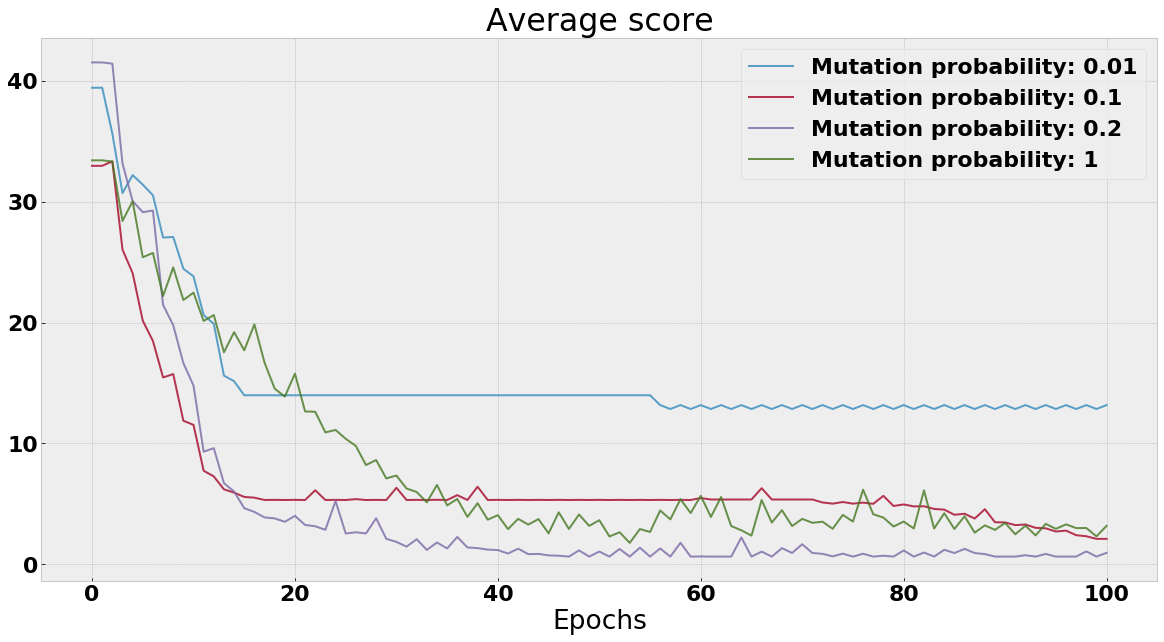

In [531]:
ga1 = GA(pop_size = 10,n_dims = 3, fun = fun)
ga2 = GA(pop_size = 10,n_dims = 3, fun = fun)
ga3 = GA(pop_size = 10,n_dims = 3, fun = fun)
ga4 = GA(pop_size = 10,n_dims = 3, fun = fun)

ga1.fit(50, mut_prob = 0.01)
ga2.fit(50, mut_prob = 0.1)
ga3.fit(50, mut_prob = 0.2)
ga4.fit(50, mut_prob = 1)

a = len(ga1.average_scores)

fig = plt.figure(figsize = [20,10])
ax = plt.subplot(111)
plt.plot(range(a), ga1.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 0.01")
plt.plot(range(a), ga2.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 0.1")
plt.plot(range(a), ga3.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 0.2")
plt.plot(range(a), ga4.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 1")
plt.title('Average score')
plt.xlabel("Epochs")
ax.legend()
plt.show()

## Rastring function

In [566]:
def Rastring(x):
    A = 10
    result = 10
    for i in range(x.shape[0]):
        result += x[i]**2 - A*math.cos(2*np.pi*x[i])
    return result

ga = GA(pop_size = 1000,n_dims = 5, fun = Rastring)

In [567]:
ga.fit(50)

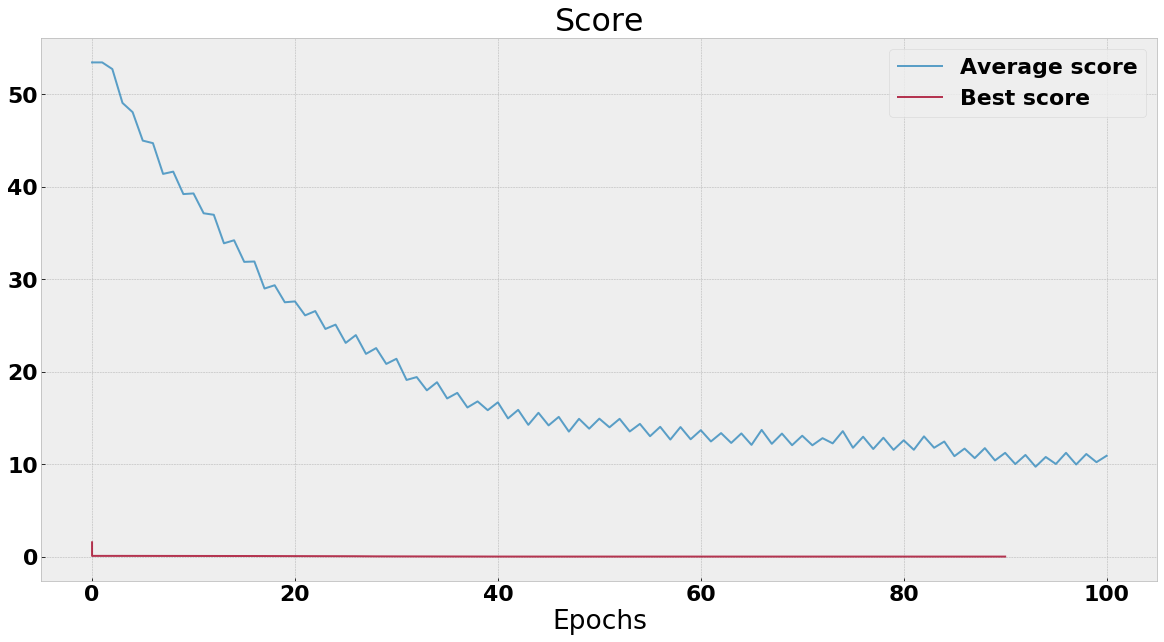

In [568]:
a = len(ga.average_scores)
b = ga.when_best
fig = plt.figure(figsize = [20,10])
ax = plt.subplot(111)
plt.plot(range(a), ga.average_scores, alpha = 0.8, markersize = 4, label = "Average score")
plt.plot(b, ga.best_scores[1:], alpha = 0.8, markersize = 4, label = "Best score")
plt.title('Score')
plt.xlabel("Epochs")
ax.legend()
plt.show()

In [552]:
print(ga.best_scores[-1])
print(ga.best_genotype[-1])

0.0012077310770752803
[-1.93620027 -1.72896713 -0.60296098 -1.04725207 -0.95722146]


### Different population sizes

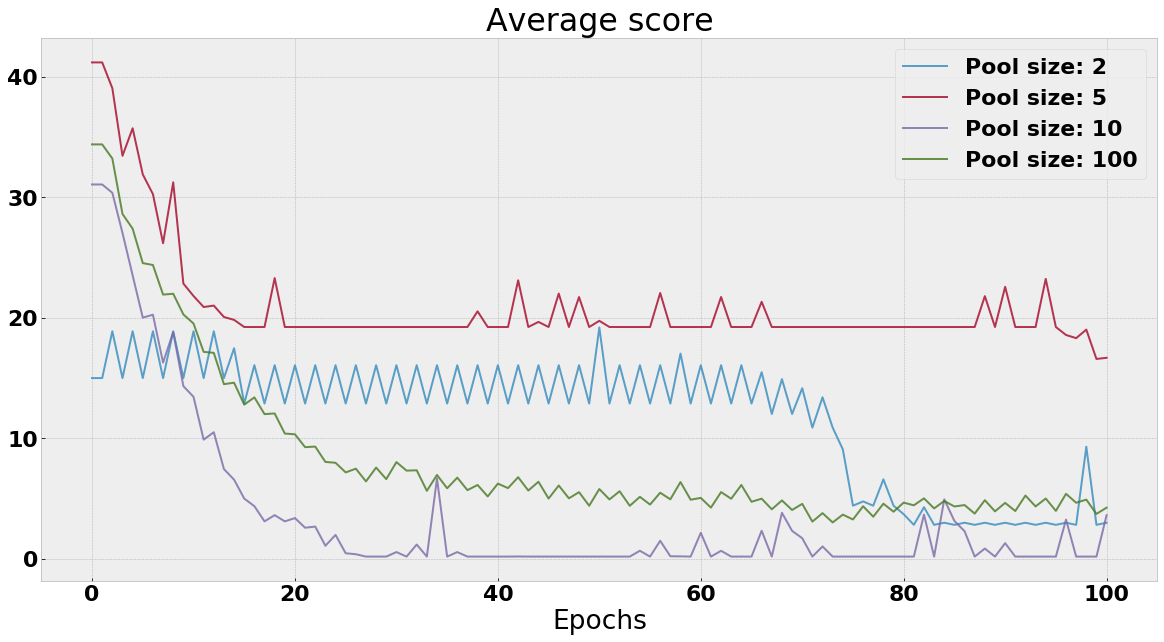

In [550]:
ga1 = GA(pop_size = 2,n_dims = 3, fun = Rastring)
ga2 = GA(pop_size = 5,n_dims = 3, fun = Rastring)
ga3 = GA(pop_size = 10,n_dims = 3, fun = Rastring)
ga4 = GA(pop_size = 100,n_dims = 3, fun = Rastring)

ga1.fit(50)
ga2.fit(50)
ga3.fit(50)
ga4.fit(50)

a = len(ga1.average_scores)

fig = plt.figure(figsize = [20,10])
ax = plt.subplot(111)
plt.plot(range(a), ga1.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 2")
plt.plot(range(a), ga2.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 5")
plt.plot(range(a), ga3.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 10")
plt.plot(range(a), ga4.average_scores, alpha = 0.8, markersize = 4, label = "Pool size: 100")
plt.title('Average score')
plt.xlabel("Epochs")
ax.legend()
plt.show()

### Different mutation probabilities

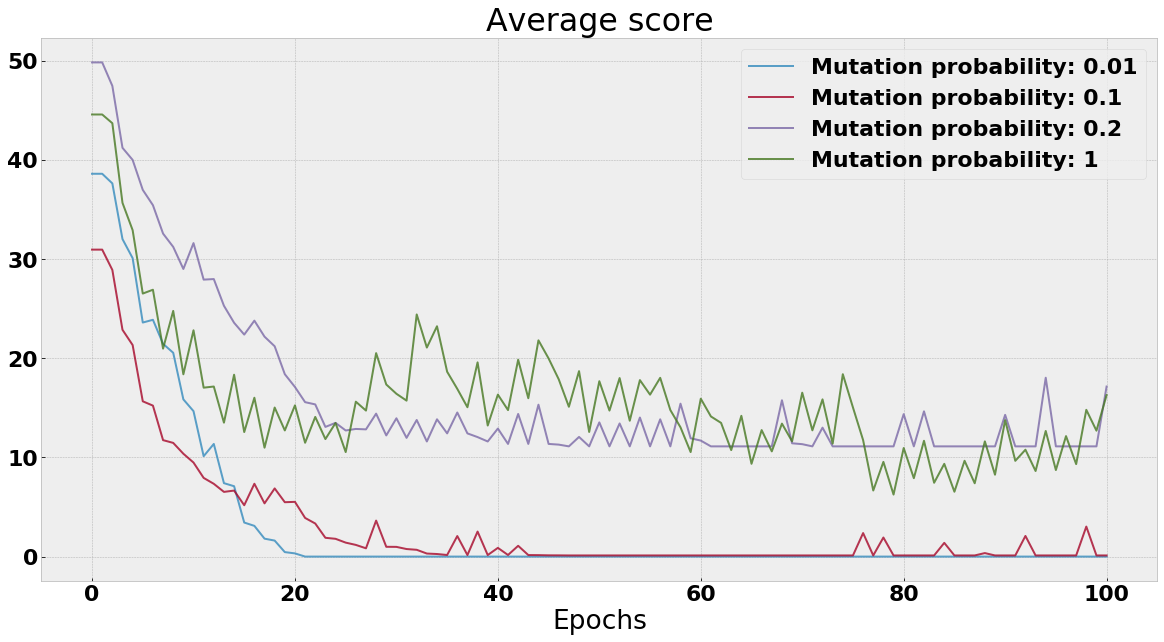

In [551]:
ga1 = GA(pop_size = 10,n_dims = 3, fun = Rastring)
ga2 = GA(pop_size = 10,n_dims = 3, fun = Rastring)
ga3 = GA(pop_size = 10,n_dims = 3, fun = Rastring)
ga4 = GA(pop_size = 10,n_dims = 3, fun = Rastring)

ga1.fit(50, mut_prob = 0.01)
ga2.fit(50, mut_prob = 0.1)
ga3.fit(50, mut_prob = 0.2)
ga4.fit(50, mut_prob = 1)

a = len(ga1.average_scores)

fig = plt.figure(figsize = [20,10])
ax = plt.subplot(111)
plt.plot(range(a), ga1.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 0.01")
plt.plot(range(a), ga2.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 0.1")
plt.plot(range(a), ga3.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 0.2")
plt.plot(range(a), ga4.average_scores, alpha = 0.8, markersize = 4, label = "Mutation probability: 1")
plt.title('Average score')
plt.xlabel("Epochs")
ax.legend()
plt.show()